In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
np.random.seed(123)

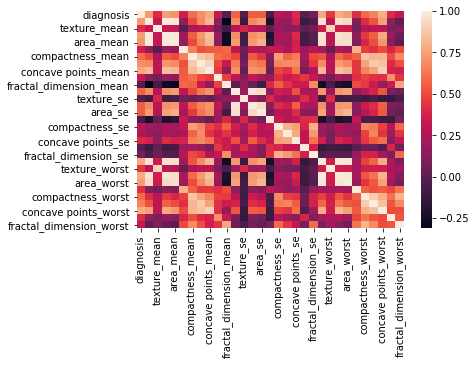

In [5]:
data = pd.read_csv(r'C:\Users\DEVIL\Downloads\Compressed\breast-cancer-wisconsin-data\data.csv')
data = data.iloc[:,1:-1]
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
corr = data.corr()
sns.heatmap(corr)
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

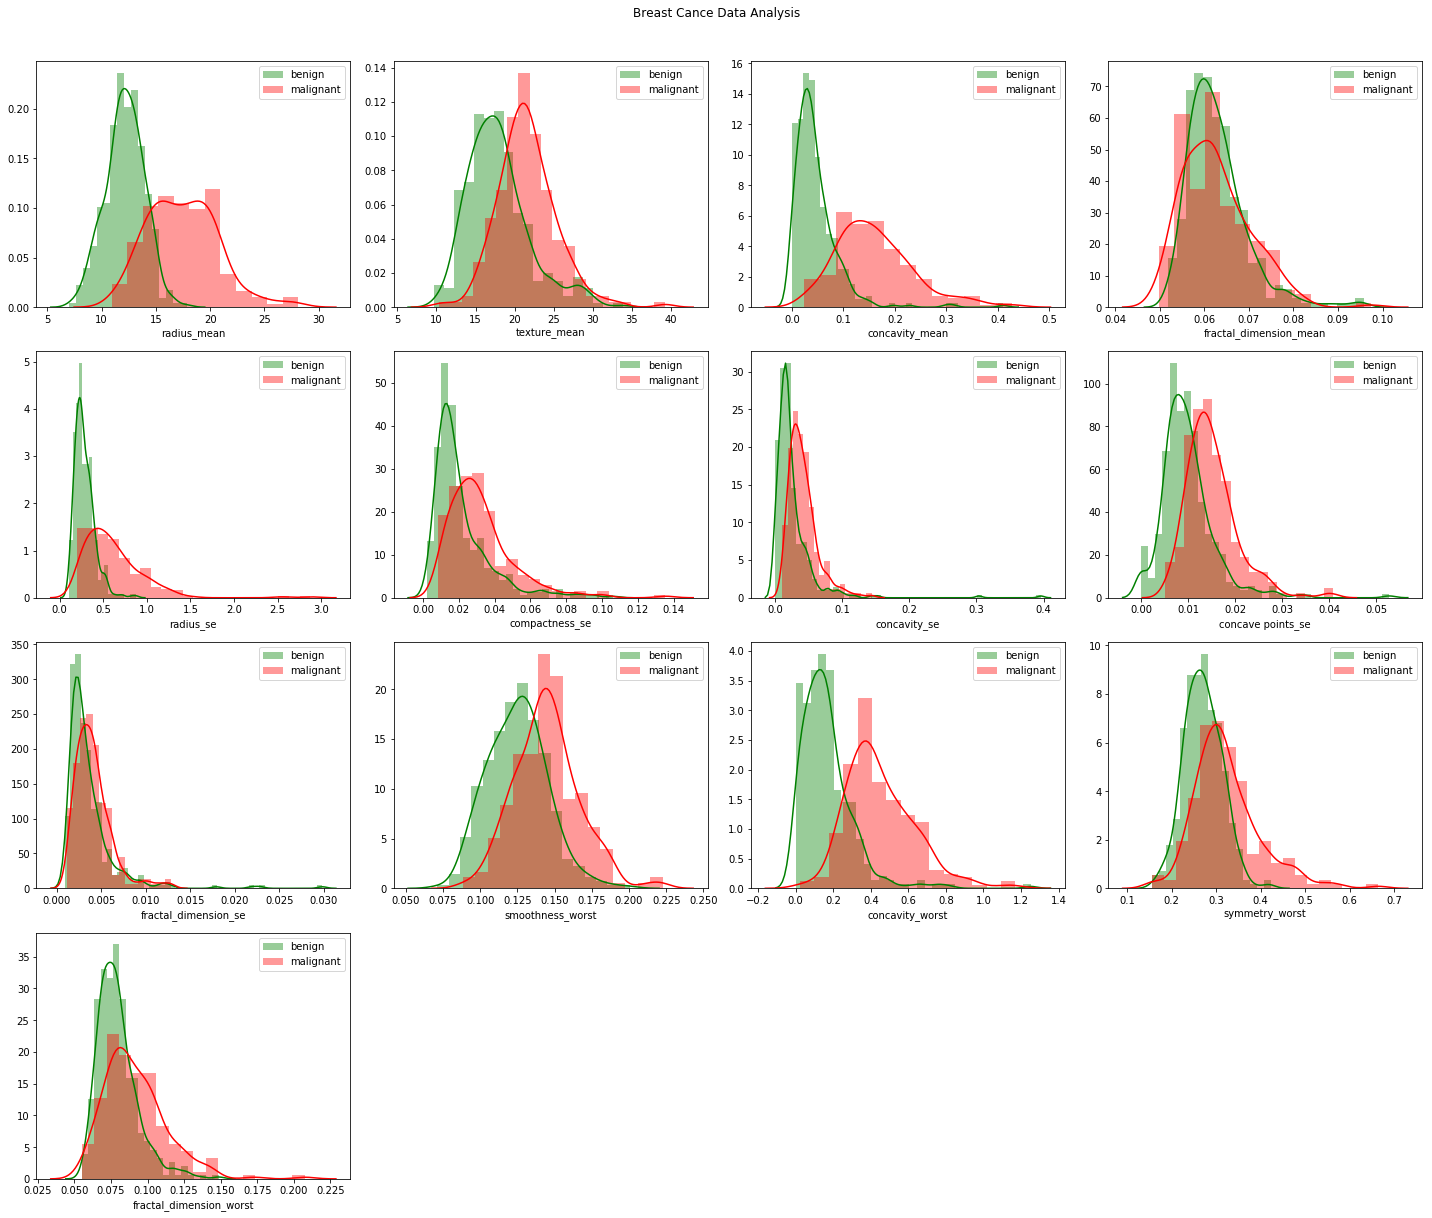

In [7]:
selected_columns = data.columns[columns]
data = data[selected_columns]
selected_columns = selected_columns[1:].values
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,0]
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4,j+1)
    j += 1
    sns.distplot(data[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

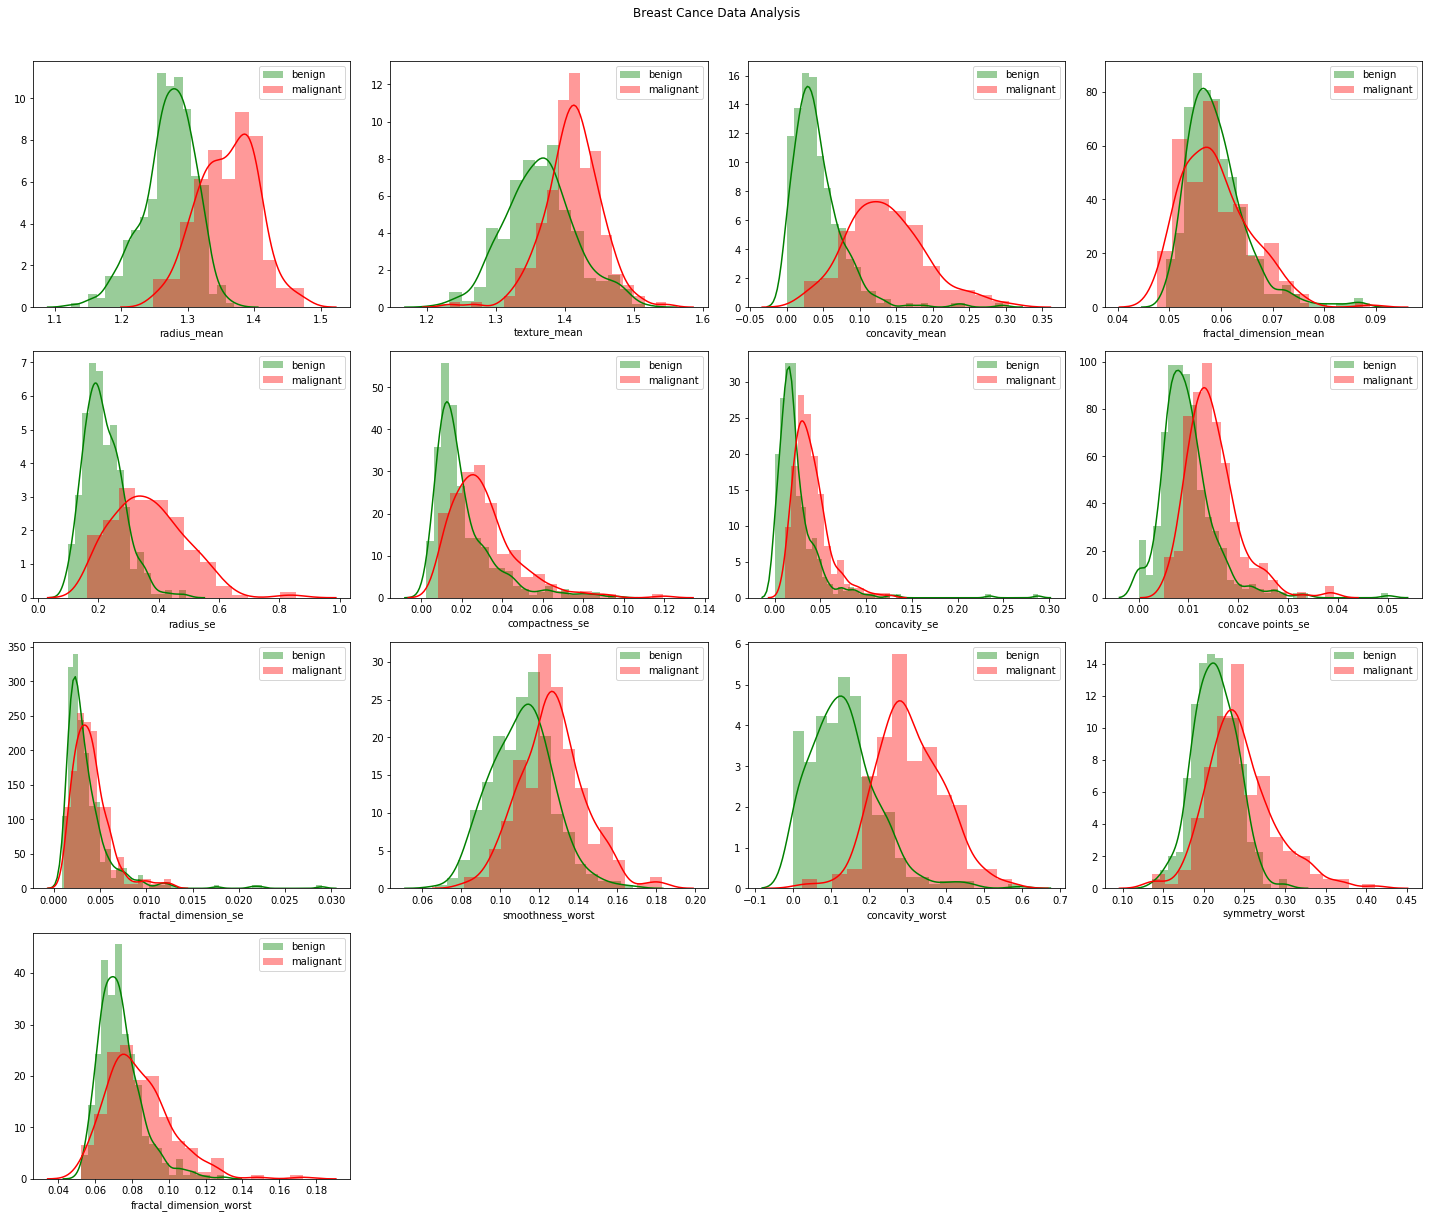

In [20]:
data=np.log(1+data)
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4,j+1)
    j += 1
    sns.distplot(data[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
pred1=clf.predict(x_test)
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
cm = confusion_matrix(y_test, prediction)
cm1= confusion_matrix(y_test,pred)
cm2=confusion_matrix(y_test,pred1)
sum = 0
sum1=0
sum2=0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    sum1+=cm1[i][i]
    sum2+=cm2[i][i]
    
accuracy = sum/x_test.shape[0]
acc=sum1/x_test.shape[0]
acc1=sum2/x_test.shape[0]
print("SVC Accuracy:", accuracy)

SVC Accuracy: 0.8859649122807017


In [17]:
print("Logistic Regression Accuracy: ", acc)

Logistic Regression Accuracy:  0.9122807017543859


In [18]:
print("Decision Tree Accuracy: ",acc1)

Decision Tree Accuracy:  0.956140350877193
